In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.patches import Ellipse
from matplotlib import patches
import plotly.graph_objs as go
import plotly.express as px
from utils.computation import *
from utils.diagnostics import *
%matplotlib notebook
np.set_printoptions(formatter={'float': lambda x: "{0:5.3f}".format(x)})

to do : 
    1. test more functions
    2. try one-step line search
    3. plot grid of convergence

# Visualisation tool

In [8]:
def plot_scatter(func, lim, N):
    x, y = np.linspace(-lim, lim, N), np.linspace(-lim, lim, N)
    xx, yy = np.meshgrid(x, y)
    zz = np.zeros(xx.shape)
    for i in range(len(x)):
        for j in range(len(y)):
            zz[i, j] = func([x[i], y[j]])
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.scatter(x=xx.ravel(), y=yy.ravel(),c=zz.ravel())
    fig.show()
def plot_surface(func, lim, N):
    x, y = np.linspace(-lim, lim, N), np.linspace(-lim, lim, N)
    z = []
    for i in x:
        z_line = []
        for j in y:
            z_line.append(func([i,j]))
        z.append(z_line)

    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_z=True))
    fig.update_layout(title='Ackley', autosize=False,
                      scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                      width=500, height=500,
                      margin=dict(l=65, r=50, b=65, t=90)
    )
    fig.show()

# tested objective function

In [4]:
def bukin(x):
    '''
    
    '''
    return 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2)) + 0.01 * np.abs(x[0] + 10)

<IPython.core.display.Javascript object>


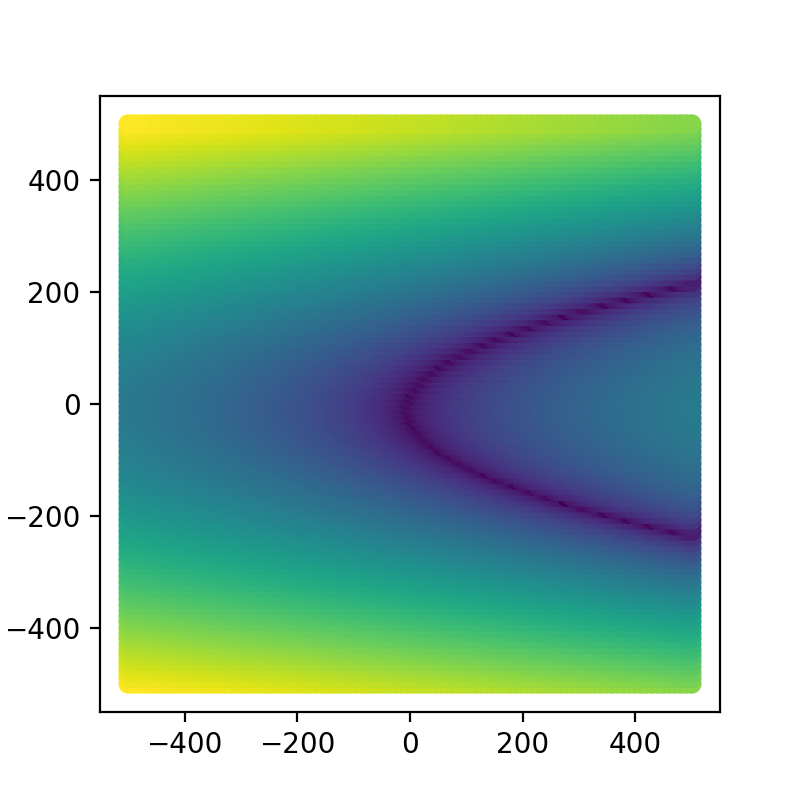

In [9]:
N = 100
lim = 500
plot_scatter(bukin, lim, N)

In [12]:
plot_surface(bukin, lim, N)

# Optimisation Framework

In [2]:
class non_convex_optimisation:
    def __init__(self, func, dfunc, global_arg, global_val):
        self.func = func
        self.dfunc = dfunc
        self.global_arg = global_arg
        self.global_val = global_val
    def do_experiments(self, mean0, D, alpha, beta, adjust):
        try:
            self.val, self.arg, self.stats = cma_es_general(mean0, D, alpha, beta, adjust, self.func, self.dfunc)
        except np.linalg.LinAlgError as err:
            self.val, self.arg = None, None
            self.stats['status'] = 'd'
            print('diverge with LinAlgError!')
    def plot_distance(self):
        plot_distance(self.arg, self.val)
    def animate_moving_cluster(self, num):
        return animate_moving_cluster(self.stats, num)
    def animate_scatterplot_distance(self):
        return animate_scatterplot_distance(self.arg, self.val, self.stats)
    def print_mean_variance(self):
        print_mean_variance(self.stats)
    def print_evaluations_per_iteration(self):
        print_evaluations_per_iteration(self.stats)
    def print_arguments_before_and_after_move(self):
        print_arguments_before_and_after_move(self.stats)
    def get_recorded_data(self):
        return self.val, self.arg, self.stats
    def generate_point_cloud(self, sigma, alpha, beta, adjust):
        self.res, self.points = generate_point_cloud(sigma, alpha, beta, adjust, self.func, self.dfunc, self.global_arg, self.global_val)
    def plot_prob_vs_radius(self, *args):
        plot_prob_vs_radius(self.res, self.points, *args)
    def plot_cloud_point(self):
        plot_cloud_point(self.res, self.points)
    def get_results_points(self):
        return self.res, self.points